# numpy

[numpy](https://numpy.org/) is a powerful array library for python, and it lies behind almost every image-reading library that you'll come across (or, they will at least have a "numpy-like" API).  A basic familiarity with numpy arrays is critical when working with image data.  I recommend reading through the [numpy quickstart](https://numpy.org/doc/stable/user/quickstart.html)

## `numpy.ndarray`

NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type:

In [74]:
import numpy as np

# one of the *many* ways to create a numpy array is to pass a (nested) python
# list to the `np.array` constructor
array = np.array(
    [[1., 0., 0.],
     [0., 1., 2.]]
)

print(type(array))

# all arrays have a data type, and every item in the array has the same dtype:
print("dtype:", array.dtype)

# a shape, that shows the dimensions of the array:
print("shape (rows x columns):", array.shape)

<class 'numpy.ndarray'>
dtype: float64
shape (rows x columns): (2, 3)


## Basic Operations
Arithmetic operators on arrays apply **elementwise**. A new array is created and filled with the result.

In [75]:
a = np.array([2, 2, 3, 3])
b = np.arange(4)
c = a + b
print("  a:", a)
print("  b:", b)
print("a+b:", c)

  a: [2 2 3 3]
  b: [0 1 2 3]
a+b: [2 3 5 6]


In [76]:
b**2

array([0, 1, 4, 9])

In [77]:
np.sin(b) * 10 - c

array([-2.        ,  5.41470985,  4.09297427, -4.58879992])

Many unary operations, such as computing the sum of all the elements in the array, are implemented as methods of the ndarray class.

In [78]:
# get the sum of all elements in an array
x = np.array(
    [[5., 0., 1.],
     [0., 2., 3.]]
)
print(x.sum())
x.sum() == np.sum(x)

11.0


True

In [79]:
# get the max of all elements in an array
print(x.max())
x.max() == np.max(x)

5.0


True

By default, these operations apply to the array as though it were a list of numbers, regardless of its shape. However, by specifying the axis parameter you can apply an operation along the specified axis of an array:

In [80]:
x.max(axis=0)

array([5., 2., 3.])

In [81]:
x.max(axis=1)

array([5., 3.])

## reminder, tifffile returns a numpy array

There are tons of ways to make a new numpy array... but to keep this on the topic of images, let's use the numpy array returned to us by the `tifffile` library.

In [93]:
import tifffile

img = tifffile.imread('data/mm_ex_w1488.TIF')
print(img.shape, img.dtype)

(7, 302, 302) uint16


# Indexing, Slicing and Iterating

Often, we need to extract just part of the array (for cropping, or dealing with a single plane of multidimensional data).

arrays are index with brackets (`[]`) and can have one index per axis. These indices are given in a tuple separated by commas:

In [73]:
# index into the volume

first_plane = img[0]
print(first_plane.shape)
first_plane

(302, 302)


array([[105, 101, 103, ..., 102, 104, 101],
       [101, 100, 104, ..., 102, 106, 105],
       [103, 105, 102, ..., 102, 102, 102],
       ...,
       [210, 216, 209, ..., 139, 145, 142],
       [225, 237, 229, ..., 144, 140, 151],
       [245, 242, 249, ..., 141, 154, 152]], dtype=uint16)

In [72]:
first_plane_second_row = img[0, 1]
first_plane_second_row

array([101, 100, 104,  95, 101, 102, 109, 104, 102, 105, 103, 103, 103,
        98,  99, 105,  98, 103, 100, 109, 103, 102, 105, 101, 106, 105,
       102, 106, 103,  99, 106, 102, 103, 106,  97, 104,  95, 105, 105,
       108, 107, 100, 102,  98, 103, 104, 104, 101, 110,  99, 107, 104,
       100, 105, 101, 102, 101, 100, 103, 110, 103,  97, 107, 107, 108,
       104, 106, 111, 104, 102, 105, 108, 102, 108, 102, 100, 105, 102,
       105, 103, 103, 102, 111, 107, 104, 107, 106, 103, 105, 104, 101,
       106, 103, 110, 113, 102, 102, 103, 104, 103, 104, 101, 102, 103,
       102, 101, 108, 107, 101, 103, 103, 107,  96, 108, 103, 106, 106,
       114, 115, 121, 112, 121, 135, 136, 144, 147, 147, 154, 146, 148,
       150, 150, 154, 151, 151, 159, 147, 155, 142, 148, 151, 144, 144,
       143, 152, 147, 146, 143, 149, 149, 154, 139, 149, 150, 153, 153,
       142, 148, 149, 152, 147, 151, 144, 154, 150, 144, 145, 146, 153,
       148, 141, 145, 148, 148, 147, 146, 149, 139, 143, 143, 13

In [92]:
# use ":" to "slice" a subset of a specific axis

# take the first three planes, rows 100-199, and everything from column 250 on
cropped = img[:3, 100:200, 250:]
cropped.shape

(3, 100, 52)

### some common image-related operations

In [99]:
import matplotlib.pyplot as plt

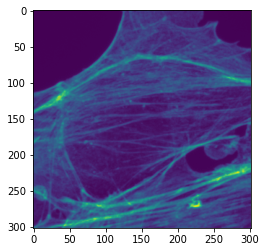

In [112]:
# max intensity projection
max_projection = img.max(0)
plt.imshow(max_projection)

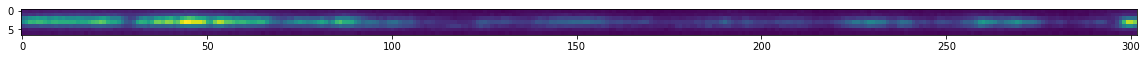

In [113]:
# slice and show ZY plane 
plt.figure(figsize=(20,1))
plt.imshow(img[:, 150])

In [128]:
# get all pixels greater than some value
mask = max_projection > 500
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

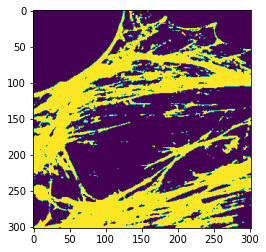

In [129]:
plt.imshow(mask)

In [132]:
# use that "binary mask" to index into the original array
# i.e. get all pixels where the value is greater than 500
bright_pixels = max_projection[mask]
print(bright_pixels.shape)
print(bright_pixels.mean())

(34722,)
741.5274465756581
